<a href="https://colab.research.google.com/github/dbetanc1/MAT421/blob/main/Module_B_Section_17_1%2C_17_2%2C_17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 17 Interpolation**

Sometimes you have measurements that are
assumed to be very reliable; in these cases, you want an estimation function that goes through the data points you
have. This technique is commonly referred to as interpolation.

# **Section 17.1 Interpolation Problem Statement**

---

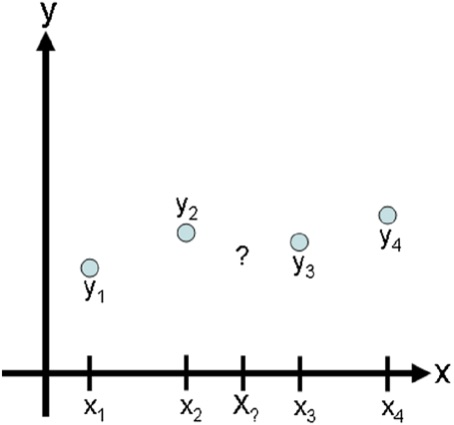

https://pythonnumericalmethods.berkeley.edu/_images/17.01.01-Illustration_of_Interpolation.jpg

Assume we have a data set consisting of independent data values, xi, and dependent data values, yi, where i=1,…,n. We would like to find an estimation function y^(x) such that y^(xi)=yi for every point in our data set. This means the estimation function goes through our data points. Given a new x∗, we can interpolate its function value using y^(x∗). In this context, y^(x) is called an interpolation function.

# **Section 17.2 Linear Interpolation**

---

In linear interpolation, the estimated point is assumed to lie on the line joining the nearest points to the left and right.

In [4]:
#TRY IT! Find the linear interpolation at x=1.5 based on the data x = [0, 1, 2], y = [1, 3, 2]. Verify the result using scipy’s function interp1d.

from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)


2.5


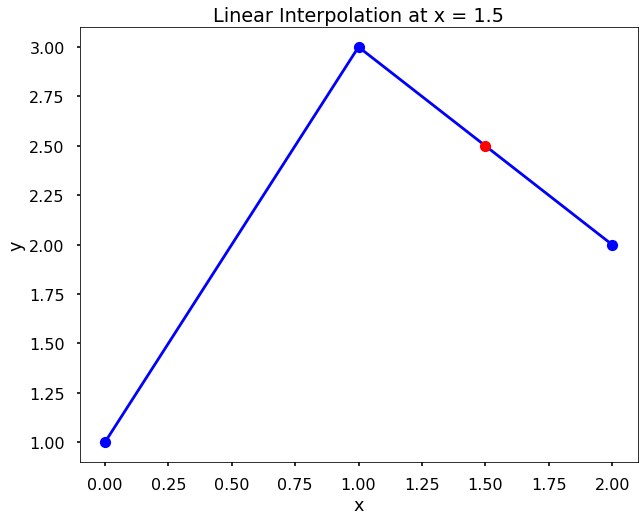

In [3]:

plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **Section 17.3 Cubic Spline Interpolation**

---

In cubic spline interpolation (as shown in the following figure), the interpolating function is a set of piecewise cubic functions.

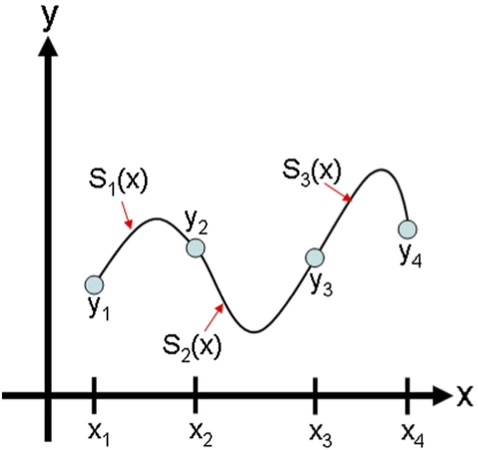

https://pythonnumericalmethods.berkeley.edu/_images/17.03.01-Illustration_of_cubic_interpolation.jpg

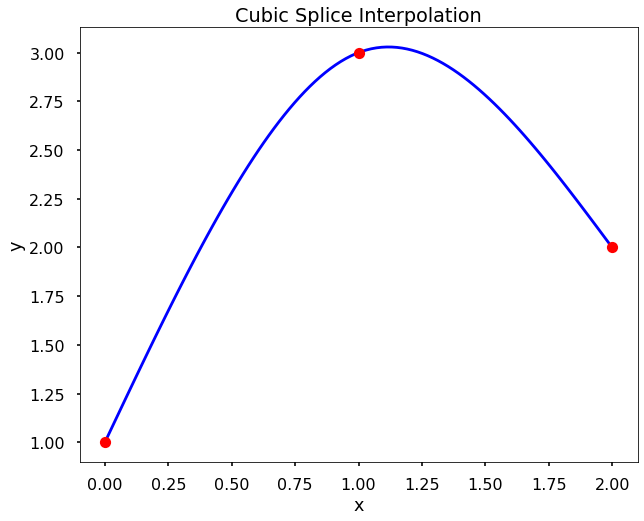

In [5]:
#TRY IT! Use CubicSpline to plot the cubic spline interpolation of the data set x = [0, 1, 2] and y = [1, 3, 2] for 0≤x≤2.

from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [0, 1, 2]
y = [1, 3, 2]

#use bc_type = 'natural' adds the contraints
f= CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

plt.figure(figsize= (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Splice Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
#TRY IT! Find the cubic spline interpolation at x = 1.5 based on the data x = [0, 1, 2], y = [1, 3, 2].

b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])
np.dot(np.linalg.inv(A), b)

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

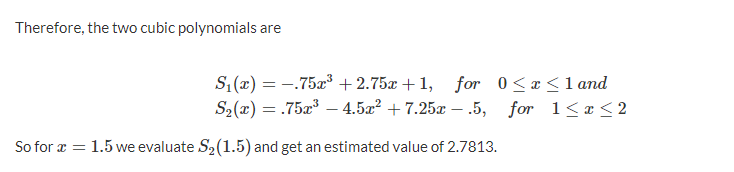